# Linear Regression Lab to predict height


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
dataset = pd.read_csv('Galtons Height Data.csv')
dataset.head(15)


,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4
8,3,75.0,64.0,M,71.0,2
9,3,75.0,64.0,F,68.0,2


## Initial Analysis
There seems to be groups of family members
Features:
    * Family
    * Father
    * Mother
    * Gender
    * Height
    * Kids
The folling features could be removed from our model: Family and Kids.
Have x = Father and mother's height and the kids gender
Have y = the height


In [85]:
X = dataset.iloc[:,1:4].values # Get the Father and Mother's height, gender 
y = dataset.iloc[:,-2].values

In [86]:
X

array([[78.5, 67.0, 'M'],
       [78.5, 67.0, 'F'],
       [78.5, 67.0, 'F'],
       ...,
       [68.5, 65.0, 'F'],
       [68.5, 65.0, 'F'],
       [68.5, 65.0, 'F']], dtype=object)

In [87]:
y

array([73.2, 69.2, 69. , 69. , 73.5, 72.5, 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       76.5, 74. , 73. , 73. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       74. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 68. , 67. ,
       71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7, 66.5, 64.5,
       63.5, 74. , 73. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5, 64. , 62.7,
       73.2, 73. , 72.7, 70. , 69. , 68.5, 68. , 66. , 73. , 68.5, 68. ,
       73. , 71. , 67. , 74.2, 70.5, 69.5, 66. , 65.5, 65. , 65. , 65.5,
       66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. , 63. , 73. ,
       67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. , 71. , 70. ,
       70. , 66. , 65. , 65. , 74. , 72. , 69. , 67.5, 63.5, 72. , 71.5,
       71.5, 70. , 68. , 65.7, 78. , 74. , 73. , 72. , 67. , 73.2, 73. ,
       69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5, 66. , 64.5,
       63. , 71. , 67. , 76. , 72. , 71. , 66. , 66

## Transforming our Genders

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

X

array([[0.0, 1.0, 78.5, 67.0],
       [1.0, 0.0, 78.5, 67.0],
       [1.0, 0.0, 78.5, 67.0],
       ...,
       [1.0, 0.0, 68.5, 65.0],
       [1.0, 0.0, 68.5, 65.0],
       [1.0, 0.0, 68.5, 65.0]], dtype=object)

## Spliting our data between training sets and testing sets

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2,random_state=101)

In [90]:
X_test

array([[0.0, 1.0, 69.0, 63.0],
       [0.0, 1.0, 70.0, 69.0],
       [0.0, 1.0, 71.0, 63.0],
       [1.0, 0.0, 71.0, 62.5],
       [0.0, 1.0, 70.0, 61.0],
       [1.0, 0.0, 68.0, 64.0],
       [0.0, 1.0, 69.0, 66.5],
       [0.0, 1.0, 70.0, 65.0],
       [0.0, 1.0, 68.0, 63.0],
       [1.0, 0.0, 70.0, 66.5],
       [1.0, 0.0, 64.0, 64.0],
       [1.0, 0.0, 70.0, 67.0],
       [0.0, 1.0, 69.5, 66.0],
       [0.0, 1.0, 71.0, 69.0],
       [0.0, 1.0, 72.0, 62.0],
       [1.0, 0.0, 71.0, 62.0],
       [1.0, 0.0, 65.0, 65.0],
       [0.0, 1.0, 64.0, 64.0],
       [1.0, 0.0, 69.0, 63.5],
       [0.0, 1.0, 70.5, 64.0],
       [1.0, 0.0, 68.0, 65.5],
       [1.0, 0.0, 68.7, 70.5],
       [0.0, 1.0, 69.0, 66.0],
       [0.0, 1.0, 72.5, 62.0],
       [0.0, 1.0, 69.2, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [0.0, 1.0, 71.0, 66.0],
       [1.0, 0.0, 70.0, 63.0],
       [1.0, 0.0, 75.5, 66.5],
       [1.0, 0.0, 70.0, 64.7],
       [1.0, 0.0, 64.0, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [92]:
X_test

array([[0.0, 1.0, 69.0, 63.0],
       [0.0, 1.0, 70.0, 69.0],
       [0.0, 1.0, 71.0, 63.0],
       [1.0, 0.0, 71.0, 62.5],
       [0.0, 1.0, 70.0, 61.0],
       [1.0, 0.0, 68.0, 64.0],
       [0.0, 1.0, 69.0, 66.5],
       [0.0, 1.0, 70.0, 65.0],
       [0.0, 1.0, 68.0, 63.0],
       [1.0, 0.0, 70.0, 66.5],
       [1.0, 0.0, 64.0, 64.0],
       [1.0, 0.0, 70.0, 67.0],
       [0.0, 1.0, 69.5, 66.0],
       [0.0, 1.0, 71.0, 69.0],
       [0.0, 1.0, 72.0, 62.0],
       [1.0, 0.0, 71.0, 62.0],
       [1.0, 0.0, 65.0, 65.0],
       [0.0, 1.0, 64.0, 64.0],
       [1.0, 0.0, 69.0, 63.5],
       [0.0, 1.0, 70.5, 64.0],
       [1.0, 0.0, 68.0, 65.5],
       [1.0, 0.0, 68.7, 70.5],
       [0.0, 1.0, 69.0, 66.0],
       [0.0, 1.0, 72.5, 62.0],
       [0.0, 1.0, 69.2, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [0.0, 1.0, 71.0, 66.0],
       [1.0, 0.0, 70.0, 63.0],
       [1.0, 0.0, 75.5, 66.5],
       [1.0, 0.0, 70.0, 64.7],
       [1.0, 0.0, 64.0, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [

In [93]:
y_pred = regressor.predict(X_test)

In [94]:
y_pred.reshape(len(y_pred),1)

array([[68.67],
       [71.06],
       [69.48],
       [64.24],
       [68.41],
       [63.52],
       [69.83],
       [69.74],
       [68.26],
       [65.16],
       [61.88],
       [65.33],
       [69.86],
       [71.47],
       [69.56],
       [64.08],
       [62.62],
       [66.95],
       [63.76],
       [69.61],
       [64.01],
       [65.96],
       [69.66],
       [69.77],
       [69.08],
       [66.11],
       [70.48],
       [64.  ],
       [67.41],
       [64.57],
       [61.88],
       [66.11],
       [68.43],
       [71.55],
       [64.74],
       [70.19],
       [69.74],
       [64.33],
       [69.63],
       [68.01],
       [65.99],
       [70.6 ],
       [66.44],
       [65.41],
       [64.33],
       [67.26],
       [64.33],
       [63.52],
       [69.01],
       [69.74],
       [69.66],
       [63.52],
       [69.89],
       [68.72],
       [68.33],
       [64.49],
       [64.4 ],
       [69.83],
       [70.15],
       [66.84],
       [62.94],
       [68.59],
       [

## Creating a visual

In [95]:
#plt.scatter(X_train, y_train, color= 'blue')
#plt.plot(X_train, regressor.predict(X_train), color= "red")
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[68.67 70.  ]
 [71.06 68.7 ]
 [69.48 71.  ]
 [64.24 64.  ]
 [68.41 71.2 ]
 [63.52 62.  ]
 [69.83 71.  ]
 [69.74 71.  ]
 [68.26 68.  ]
 [65.16 66.  ]
 [61.88 64.  ]
 [65.33 60.  ]
 [69.86 71.  ]
 [71.47 73.  ]
 [69.56 71.5 ]
 [64.08 64.5 ]
 [62.62 65.  ]
 [66.95 70.5 ]
 [63.76 63.  ]
 [69.61 68.  ]
 [64.01 64.  ]
 [65.96 61.7 ]
 [69.66 69.  ]
 [69.77 70.  ]
 [69.08 71.7 ]
 [66.11 68.  ]
 [70.48 70.  ]
 [64.   62.  ]
 [67.41 65.5 ]
 [64.57 65.5 ]
 [61.88 64.  ]
 [66.11 66.  ]
 [68.43 72.  ]
 [71.55 73.  ]
 [64.74 65.  ]
 [70.19 70.  ]
 [69.74 69.  ]
 [64.33 67.  ]
 [69.63 69.  ]
 [68.01 68.  ]
 [65.99 64.  ]
 [70.6  70.5 ]
 [66.44 65.  ]
 [65.41 67.  ]
 [64.33 64.  ]
 [67.26 64.  ]
 [64.33 62.  ]
 [63.52 64.  ]
 [69.01 71.  ]
 [69.74 69.  ]
 [69.66 71.7 ]
 [63.52 61.  ]
 [69.89 73.  ]
 [68.72 69.  ]
 [68.33 72.  ]
 [64.49 64.  ]
 [64.4  62.5 ]
 [69.83 73.  ]
 [70.15 68.  ]
 [66.84 66.  ]
 [62.94 63.5 ]
 [68.59 71.2 ]
 [60.93 57.  ]
 [66.95 68.  ]
 [69.1  65.2 ]
 [69.66 71.2 ]
 [68.54 69

In [107]:
X_test


array([[0.0, 1.0, 69.0, 63.0],
       [0.0, 1.0, 70.0, 69.0],
       [0.0, 1.0, 71.0, 63.0],
       [1.0, 0.0, 71.0, 62.5],
       [0.0, 1.0, 70.0, 61.0],
       [1.0, 0.0, 68.0, 64.0],
       [0.0, 1.0, 69.0, 66.5],
       [0.0, 1.0, 70.0, 65.0],
       [0.0, 1.0, 68.0, 63.0],
       [1.0, 0.0, 70.0, 66.5],
       [1.0, 0.0, 64.0, 64.0],
       [1.0, 0.0, 70.0, 67.0],
       [0.0, 1.0, 69.5, 66.0],
       [0.0, 1.0, 71.0, 69.0],
       [0.0, 1.0, 72.0, 62.0],
       [1.0, 0.0, 71.0, 62.0],
       [1.0, 0.0, 65.0, 65.0],
       [0.0, 1.0, 64.0, 64.0],
       [1.0, 0.0, 69.0, 63.5],
       [0.0, 1.0, 70.5, 64.0],
       [1.0, 0.0, 68.0, 65.5],
       [1.0, 0.0, 68.7, 70.5],
       [0.0, 1.0, 69.0, 66.0],
       [0.0, 1.0, 72.5, 62.0],
       [0.0, 1.0, 69.2, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [0.0, 1.0, 71.0, 66.0],
       [1.0, 0.0, 70.0, 63.0],
       [1.0, 0.0, 75.5, 66.5],
       [1.0, 0.0, 70.0, 64.7],
       [1.0, 0.0, 64.0, 64.0],
       [0.0, 1.0, 66.0, 59.0],
       [

In [159]:
y_pred

array([68.67, 71.06, 69.48, 64.24, 68.41, 63.52, 69.83, 69.74, 68.26,
       65.16, 61.88, 65.33, 69.86, 71.47, 69.56, 64.08, 62.62, 66.95,
       63.76, 69.61, 64.01, 65.96, 69.66, 69.77, 69.08, 66.11, 70.48,
       64.  , 67.41, 64.57, 61.88, 66.11, 68.43, 71.55, 64.74, 70.19,
       69.74, 64.33, 69.63, 68.01, 65.99, 70.6 , 66.44, 65.41, 64.33,
       67.26, 64.33, 63.52, 69.01, 69.74, 69.66, 63.52, 69.89, 68.72,
       68.33, 64.49, 64.4 , 69.83, 70.15, 66.84, 62.94, 68.59, 60.93,
       66.95, 69.1 , 69.66, 68.54, 69.61, 71.47, 63.59, 69.82, 65.31,
       68.02, 63.18, 62.65, 67.72, 67.69, 68.33, 69.28, 67.41, 64.41,
       64.  , 62.62, 69.89, 64.49, 64.41, 69.65, 63.59, 67.03, 66.8 ,
       64.05, 71.45, 64.66, 65.24, 65.11, 66.44, 65.11, 68.26, 71.63,
       69.66, 64.05, 68.21, 62.4 , 62.62, 70.48, 65.19, 63.87, 64.29,
       67.23, 65.89, 72.17, 64.05, 63.64, 68.51, 64.82, 68.27, 64.33,
       68.72, 64.58, 68.67, 61.88, 63.69, 69.31, 68.31, 70.27, 66.11,
       66.44, 69.74,

Text(0, 0.5, 'y_pred')

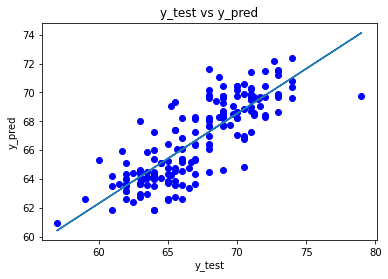

In [156]:
# Getting the fit
# Not sure if this is correct
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)

plt.scatter(y_test, y_pred, color="blue")
#plt.plot(y_test,y_pred, color='red')

plt.title('y_test vs y_pred')
plt.xlabel("y_test")
plt.ylabel('y_pred')

In [72]:
regressor.predict([[0,1,78.5, 67.0]])

array([73.88])

## Metrics for this Mutil Linear Regression Model

In [140]:
from sklearn.metrics import classification_report
print(regressor.score(X_test,y_test))

0.6648315471490732


## Simple Linear Regression

In [142]:
dataset.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [164]:
# Gather two varaibles where they might relate
# Make y = height
# Make x = the mean of both parents

col = dataset.loc[:,"Father":"Mother"]
X = col.mean(axis=1).values

y = dataset.iloc[:,-2].values
X

array([72.75, 72.75, 72.75, 72.75, 71.  , 71.  , 71.  , 71.  , 69.5 ,
       69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 66.75, 66.75, 66.75,
       66.75, 66.75, 66.75, 71.  , 71.  , 71.  , 71.  , 71.  , 71.  ,
       71.  , 70.25, 70.25, 70.25, 70.25, 69.75, 68.  , 68.  , 68.  ,
       68.  , 68.  , 68.  , 68.  , 68.  , 67.5 , 70.  , 70.  , 69.75,
       69.75, 69.75, 69.  , 69.  , 69.  , 69.  , 69.  , 69.  , 69.  ,
       69.  , 69.  , 68.75, 68.75, 68.75, 68.75, 68.75, 68.75, 68.5 ,
       68.5 , 68.5 , 68.1 , 70.85, 70.85, 70.85, 70.85, 70.85, 70.85,
       70.85, 70.85, 70.  , 70.  , 70.  , 69.5 , 69.5 , 69.5 , 68.5 ,
       68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.75, 68.  , 68.  ,
       67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 ,
       67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 68.  , 68.  , 68.  , 67.  ,
       67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.  , 67.  , 67.  ,
       67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 66.5 , 70.  ,
       70.  , 70.  ,

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[65.  61.  64.  66.5 66.5 64.  65.  64.5 64.  66.  65.5 65.  67.  67.
 66.5 67.  64.5 62.  66.  70.5 58.  66.5 64.  63.  62.  63.  64.  63.
 65.  64.5 65.  66.5 69.  63.  66.5 67.  62.  64.  65.  60.  65.  64.
 59.  65.  67.  64.  65.5 66.7 64.  66.  66.  63.  69.  63.  63.  69.
 63.  65.  62.  63.5 63.  62.5 62.  59.  62.7 64.  69.  63.  63.5 61.
 63.  65.  63.  69.  67.  62.  66.5 63.5 64.  65.5 61.  64.  62.  58.
 65.  64.5 58.  64.  60.  65.5 67.  64.  66.  63.5 66.2 67.  61.  65.
 63.  64.7 66.  64.  63.  65.  65.5 62.  62.  62.  58.5 64.  64.  63.
 64.  64.5 60.  64.5 62.5 58.5 64.  63.5 62.  64.  62.5 62.  65.  60.
 65.5 64.  64.  66.5 63.  61.  64.  64.  64.  63.  65.5 67.  62.  65.5
 67.  66.5 60.5 62.  63.  67.  60.  67.  64.  67.  66.  64.2 62.5 64.
 61.5 68.5 62.  65.  65.  61.  63.  68.5 65.  60.  62.  61.  62.  66.
 62.5 66.  62.5 65.  64.  65.  65.  64.  66.5 66.  63.  59.  62.  63.
 64.5 65.  63.  63.  62.  65.  60.  59.  66.  66.7 65.  69.  66.  65.5
 65.  66.  60.  64.5 61.  67.  64.  63.  64.7 64.  64.  65.  67.  64.
 59.  61.  62.5 62.  62.  66.5 68.5 65.  63.  66.  66.5 63.  65.  62.
 65.  66.5 60.  62.7 69.  62.5 66.  65.  65.  62.  63.  60.  63.  69.
 67.  61.  66.5 62.  65.  60.  65.  67.  63.  65.  60.  62.  65.  65.5
 69.  68.5 66.  62.  62.  65.  62.  63.  64.  65.  62.  63.  65.  60.
 64.5 59.  64.  63.  69.  63.5 65.  65.5 64.  68.  65.  62.5 66.5 63.
 67.  66.  61.  63.7 63.  64.  62.5 66.2 62.7 68.  65.  61.  63.7 66.
 65.  63.  64.5 63.  68.  63.  59.  65.  62.  65.5 65.  62.  62.  63.
 63.  62.  65.  64.  65.  63.  68.  68.  65.  69.  63.  64.  60.  66.
 63.7 66.  62.  65.5 62.  64.  64.  64.5 66.5 65.  67.  63.5 69.  64.
 63.  66.5 63.  67.  64.5 63.5 65.  66.  65.  65.5 62.  65.5 63.5 60.
 64.  63.  64.5 59.  67.  62.  65.5 65.  63.5 66.  66.  64.  64.  63.5
 69.  63.  66.7 65.5 63.5 65.5 66.  66.5 66.2 64.  65.  61.  62.7 66.
 64.  62.5 61.  62.  59.  65.  64.  63.  67.  63.  58.5 65.  68.  65.
 60.  62.  64.2 66.  64.  63.  66.5 63.  63.5 63.7 62.5 61.  66.5 63.
 66.5 67.  62.5 64.  66.5 66.5 64.7 60.  65.  63.  66.7 64.5 65.  65.
 68.5 65.  63.  63.  66.5 63.5 66.  61.  65.  63.  59.  65.  65.  60.
 58.  60.  64.  63.5 64.  64.7 65.  66.  65.  59.  64.  63.5 64.  61.
 65.  69.  62.5 64.5 62.  69.  67.  65.  65.  63.  67.  64.  63.  62.
 64.  64.7 65.  63.5 62.  63.5 63.  62.  63.  62.5 63.5 60.  69.  63.5
 64.  66.5 68.5 66.  62.  64.  66.2 65.  63.5 67.  65.  65.5 65.5 64.
 65.  64.  65.  65.5 65.  67.  65.5 64.  65.5 68.5 62.5 66.5 63.  60.
 62.5 66.  63.7 63.  67.  65.  65.  67.  64.  62.  63.5 65.  62.7 65.
 64.5 64.  63.5 62.  64.  67.  66.  66.  64.  66.5 63.  59.  65.  60.
 66.5 65.  65.  66.  64.  66.  62.  62.  67.  63.  63.5 64.  66.  66.
 65.  63.5 63.  63.  59.  63.  64.  63.  64.  63.7 62.  63.  65.5 68.
 64.5 60.  68.5 66.  66.  64.5 64.  63.  66.5 63.  65.  65.  63.  62.
 67.  62.5 65.  66.  63.  63.  66.5 63.  65.  64.  64.  67.  66.5 63.
 65.5 67.  61.  66.  66.  66.2 63.  68.5 66.  67.  68.  66.  60.  63.5
 64.5 65.  64.  66.  65.  64.5 67.  61.  63.  61.  63.  64.  62.5 62.
 65.  66.  64.  64.  69.  59.  64.5 65.  59.  64.  62.  65.  64.5 58.5
 63.  65.  67.  63.5 64.  62.  59.  66.  66.  64.  63.5 61.  62.5 66.5
 63.  65.  66.5 65.  66.  63.  65.  65.  65.5 67.  58.  67.  60.  65.5
 67.  65.  63.5 65.  66.  63.  59.  66.5 62.  64.2 64.  67.  65.  69.
 66.5 64.  66.5 66.  62.  62.  63.7 66.  64.7 65.5 64.  64.  64.  66.5
 65.5 60.  70.5 63.5 65.  65.  63.  63.  59.  60.  63.5 61.  68.5 63.5
 65.  65.  65.  64.  65.  64.5 66.  60.  65.  63.5 68.  66.  65.  61.
 65.  63.  62.  64. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.